# Image

## PCA

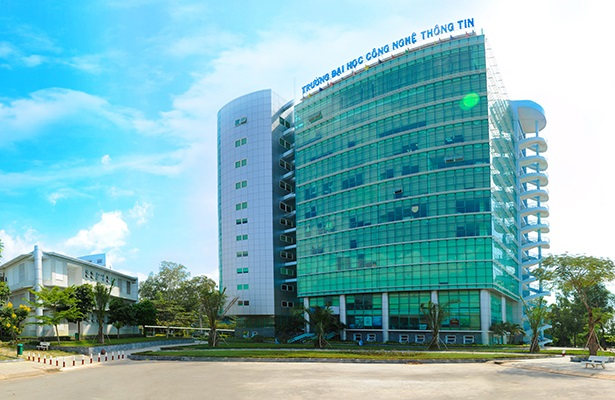

In [1]:
from google.colab.patches import cv2_imshow
import cv2
img = cv2.imread('/content/uit.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [2]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=50)

In [3]:
(B, G, R) = cv2.split(img)

In [4]:
red_channel = pca.fit_transform(R)
green_channel = pca.fit_transform(G)
blue_channel = pca.fit_transform(B)

In [5]:
red_channel = pca.inverse_transform(red_channel)
green_channel = pca.inverse_transform(green_channel)
blue_channel = pca.inverse_transform(blue_channel)

In [6]:
img_reduced = cv2.merge([blue_channel, green_channel, red_channel])

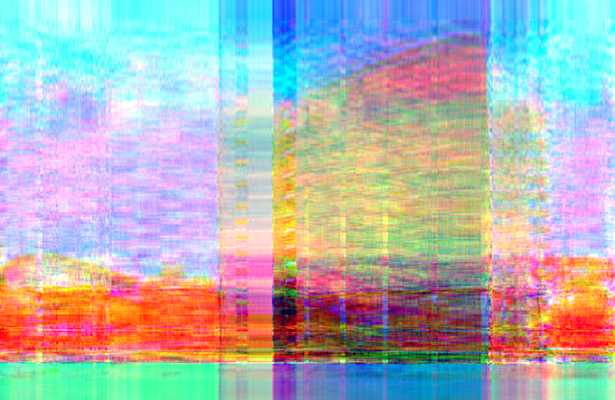

In [7]:
cv2_imshow(img_reduced)

## SVD

In [8]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=50)

In [9]:
red_channel = svd.fit_transform(R)
green_channel = svd.fit_transform(G)
blue_channel = svd.fit_transform(B)

In [10]:
red_channel = svd.inverse_transform(red_channel)
green_channel = svd.inverse_transform(green_channel)
blue_channel = svd.inverse_transform(blue_channel)

In [11]:
img_reduced = cv2.merge([blue_channel, green_channel, red_channel])

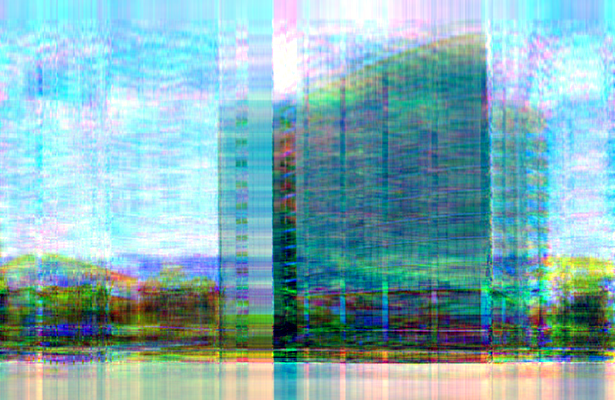

In [12]:
cv2_imshow(img_reduced)

# Sound

In [ ]:
import IPython
IPython.display.Audio('15sss.wav')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from scipy.io import wavfile
samplerate, data = wavfile.read('/content/15sss.wav')

In [ ]:
data

array([[    0,     0],
       [    0,     0],
       [    0,     0],
       ...,
       [-6835, -6690],
       [-6749, -6619],
       [-6858, -6774]], dtype=int16)

In [ ]:
from scipy.io.wavfile import write

In [ ]:
import numpy as np
left = data[:,0]
left_sound = np.pad(left.astype(float), (0, 850*850 - left.size), 
       mode='constant', constant_values=0).reshape(850, 850)

right = data[:,1]
right_sound = np.pad(right.astype(float), (0, 850*850 - right.size), 
       mode='constant', constant_values=0).reshape(850, 850)

print("left_sound: ")
print(left)
print("------------------------------------------")
print("right_sound: ")
print(right)

left_sound: 
[    0     0     0 ... -6835 -6749 -6858]
------------------------------------------
right_sound: 
[    0     0     0 ... -6690 -6619 -6774]


In [ ]:
left_channel = pca.fit_transform(left_sound)
right_channel = pca.fit_transform(right_sound)

In [ ]:
left_channel = pca.inverse_transform(left_channel)
right_channel = pca.inverse_transform(right_channel)

In [ ]:
print(left_channel.T.shape)
print(right_channel.T.shape)

(1, 722500)
(1, 722500)


In [ ]:
left_channel = left_channel.reshape(-1, 1)
right_channel = right_channel.reshape(-1, 1)
output_sound = np.concatenate((left_channel, right_channel), axis=1)
output_sound

array([[ 81.18075975,  25.88843099],
       [ 75.35753558,  10.38159516],
       [ 72.02301495,   3.68404427],
       ...,
       [-78.73808259,  48.85023726],
       [-80.98145153,  37.4884047 ],
       [-83.79465339,  24.13404251]])

In [ ]:
from numpy import int16
write("ouput.wav", samplerate, output_sound.astype(int16))

In [ ]:
IPython.display.Audio('/content/ouput.wav')

Output hidden; open in https://colab.research.google.com to view.